* * *

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
!ls -al /gdrive/MyDrive/tmp/hamm.zip
!cp /gdrive/MyDrive/tmp/hamm.zip ./
!unzip hamm.zip

-rw------- 1 root root 308385 Feb 10 05:24 /gdrive/MyDrive/tmp/hamm.zip
Archive:  hamm.zip
replace han/test/a test/g_39_10.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
!pip install qiskit
!pip uninstall qiskit
!pip install qiskit

In [ ]:
!pip install qiskit_machine_learning

In [ ]:
# from qiskit import IBMQ

# IBMQ.save_account('8753dbfc0b9bc444e4a02ada38925616a1f4f72fabf2e1e5f681715f178bcfa3faa92433ccfc0a18daf82ec44ff21fe1ce9dd4ce329b9b18e0de10119d34b481')
# IBMQ.load_account()
# provider = IBMQ.get_provider(hub='ibm-q-education', group='ibm-3')
# provider.backends()
# # backend = provider.get_backend('')

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch.autograd import Function
from torchvision import datasets, transforms
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F

import qiskit
from qiskit import transpile, assemble
from qiskit.visualization import *

import matplotlib.pyplot as plt
from torchvision.transforms.functional import to_pil_image

from pathlib import Path
import numpy as np
import pandas as pd
from PIL import Image
import sklearn
from sklearn.model_selection import train_test_split

import torchvision
from torchvision import transforms

import matplotlib.pyplot as plt
from torchvision.transforms.functional import to_pil_image

In [2]:
# if torch.cuda.is_available():
#     DEVICE = torch.device('cuda')
# else:
#     DEVICE = torch.device('cpu')
# print('Using PyTorch version:', torch.__version__, ' Device:', DEVICE)
# print('cuda index:', torch.cuda.current_device())
# print('GPU 이름:', torch.cuda.get_device_name())

tensor(1)
<built-in method type of Tensor object at 0x7f2eec000350>
349
51
torch.Size([32, 3, 28, 28])


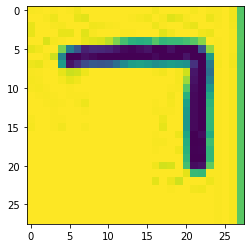

In [3]:
trans = transforms.Compose([transforms.ToTensor()])
train_dataset = torchvision.datasets.ImageFolder(root = "/content/han/train", transform=transforms.ToTensor())
test_dataset = torchvision.datasets.ImageFolder(root = "/content/han/test", transform=transforms.ToTensor())

from torch.utils.data import DataLoader

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)

import torch.nn.functional as F

train_iter = iter(train_loader)
images, labels = train_iter.next()
labels = F.one_hot(labels % 5)
print(labels[0][0])
print(labels[0][0].type)
print(len(train_dataset))
print(len(test_dataset))

print(images.shape)
plt.imshow(images[0, 1, :, :])

In [4]:
import torch.nn.functional as F
from qiskit.circuit.random import random_circuit

In [5]:
from torch import cat, no_grad, manual_seed
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import torch.optim as optim
from torch.nn import (
    Module,
    Conv2d,
    Linear,
    Dropout2d,
    NLLLoss,
    MaxPool2d,
    Flatten,
    Sequential,
    ReLU,
    CrossEntropyLoss,
    ELU
)

In [6]:
import numpy as np
import matplotlib.pyplot as plt

from torch import Tensor
from torch.nn import Linear, CrossEntropyLoss, MSELoss
from torch.optim import LBFGS

from qiskit import Aer, QuantumCircuit
from qiskit.utils import QuantumInstance, algorithm_globals
from qiskit.opflow import AerPauliExpectation
from qiskit.circuit import Parameter
from qiskit.circuit.library import RealAmplitudes, ZZFeatureMap, PauliFeatureMap, TwoLocal
from qiskit_machine_learning.neural_networks import CircuitQNN, TwoLayerQNN
from qiskit_machine_learning.connectors import TorchConnector

In [7]:
# declare quantum instance
qi = QuantumInstance(Aer.get_backend("aer_simulator_statevector"))

In [8]:
# Define QNN
feature_map = ZZFeatureMap(2)
ansatz = RealAmplitudes(2, reps=1)
# REMEMBER TO SET input_gradients=True FOR ENABLING HYBRID GRADIENT BACKPROP
qnn4 = TwoLayerQNN(
    2, feature_map, ansatz, input_gradients=True, exp_val=AerPauliExpectation(), quantum_instance=qi
)
print(qnn4.operator)

ComposedOp([
  OperatorMeasurement(1.0 * ZZ),
  CircuitStateFn(
       ┌──────────────────────────┐┌──────────────────────────────────────┐
  q_0: ┤0                         ├┤0                                     ├
       │  ZZFeatureMap(x[0],x[1]) ││  RealAmplitudes(θ[0],θ[1],θ[2],θ[3]) │
  q_1: ┤1                         ├┤1                                     ├
       └──────────────────────────┘└──────────────────────────────────────┘
  )
])


In [9]:
class Net(Module):
    def __init__(self):
        super().__init__()
        self.conv1 = Conv2d(1, 2, kernel_size=3, stride=1)
#         self.conv2 = Conv2d(5, 10, kernel_size=3, stride=1)
#         self.conv3 = Conv2d(16, 32, kernel_size=3, stride=1, padding='same')
#         self.dropout = Dropout2d()
        self.fc1 = Linear(338, 16) # have to change
        self.fc2 = Linear(16, 8)
        self.fc3 = Linear(8, 5)
        self.elu = ELU()

    def forward(self, x):
        x = F.elu(self.conv1(x))
        x = F.max_pool2d(x, 2)
#         x = F.relu(self.conv2(x))
#         x = F.max_pool2d(x, 2)
#         x = F.relu(self.conv3(x))
#         x = F.max_pool2d(x, 2)
#         x = self.dropout(x)
        x = x.view(x.shape[0], -1)
        x = self.elu(self.fc1(x))
        x = self.elu(self.fc2(x))
        x = self.fc3(x)
        x = self.elu(x)
        return x


model_qcnn = Net()

In [10]:
from torchsummary import summary
summary(model_qcnn, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 2, 26, 26]              20
            Linear-2                   [-1, 16]           5,424
               ELU-3                   [-1, 16]               0
            Linear-4                    [-1, 8]             136
               ELU-5                    [-1, 8]               0
            Linear-6                    [-1, 5]              45
               ELU-7                    [-1, 5]               0
Total params: 5,625
Trainable params: 5,625
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.02
Estimated Total Size (MB): 0.04
----------------------------------------------------------------


In [11]:
# Define model, optimizer, and loss function
optimizer = optim.Adam(model_qcnn.parameters(), lr=0.05) #change learning rate!
loss_func = CrossEntropyLoss()

DEVICE = torch.device('cpu')

# Start training
epochs = 100 #number of epochs
loss_list = []  # Store loss history
model_qcnn.train().to(DEVICE)  # Set model to training mode

for epoch in range(epochs):
    total_loss = []
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad(set_to_none=True)  # Initialize gradient
        data = data[:, 0, :, :].reshape((-1, 1, 28, 28)).to(DEVICE)
        output = model_qcnn(data).to(DEVICE)  # Forward pass
        target = F.one_hot(target, num_classes = 5).float().to(DEVICE)
#         print(target.shape)
#         print(output.shape)
#         print(output)
#         print(target)
#         break
        loss = loss_func(output, target).to(DEVICE)  # Calculate loss
        loss.backward()  # Backward pass
        optimizer.step()  # Optimize weights
        total_loss.append(loss.item())  # Store loss
    loss_list.append(sum(total_loss) / len(total_loss))
    print("Training [{:.0f}%]\tLoss: {:.4f}".format(100.0 * (epoch + 1) / epochs, loss_list[-1]))

Training [1%]	Loss: 1.8406
Training [2%]	Loss: 1.4681
Training [3%]	Loss: 1.2656
Training [4%]	Loss: 1.2822
Training [5%]	Loss: 1.2894
Training [6%]	Loss: 1.2025
Training [7%]	Loss: 1.0891
Training [8%]	Loss: 1.0408
Training [9%]	Loss: 1.0464
Training [10%]	Loss: 0.9441
Training [11%]	Loss: 0.9194
Training [12%]	Loss: 0.8131
Training [13%]	Loss: 0.7090
Training [14%]	Loss: 0.6211
Training [15%]	Loss: 0.5774
Training [16%]	Loss: 0.4931
Training [17%]	Loss: 0.3703
Training [18%]	Loss: 0.4066
Training [19%]	Loss: 0.2363
Training [20%]	Loss: 0.1992
Training [21%]	Loss: 0.1590
Training [22%]	Loss: 0.1261
Training [23%]	Loss: 0.1101
Training [24%]	Loss: 0.7990
Training [25%]	Loss: 0.6848
Training [26%]	Loss: 0.5062
Training [27%]	Loss: 0.2726
Training [28%]	Loss: 0.2150
Training [29%]	Loss: 0.1249
Training [30%]	Loss: 0.0718
Training [31%]	Loss: 0.0996
Training [32%]	Loss: 0.0672
Training [33%]	Loss: 0.0891
Training [34%]	Loss: 0.0778
Training [35%]	Loss: 0.1542
Training [36%]	Loss: 0.1095
T

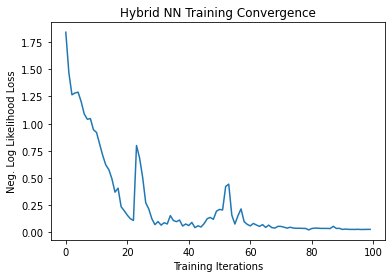

In [12]:
# Plot loss convergence
plt.plot(loss_list)
plt.title("Hybrid NN Training Convergence")
plt.xlabel("Training Iterations")
plt.ylabel("Neg. Log Likelihood Loss")
plt.show()

In [13]:
model_qcnn.eval() # set model to evaluation mode
with no_grad():

    correct = 0
    for batch_idx, (data, target) in enumerate(test_loader):
        output = model_qcnn(data[:, 0, :, :].reshape((-1, 1, 28, 28)) * 255)
        
        if len(output.shape) == 1:
            output = output.reshape(1, *output.shape)

        pred = output.argmax(dim=1, keepdim=True)
        correct += pred.eq(target.view_as(pred)).sum().item()

        loss = loss_func(output, target)
        total_loss.append(loss.item())

    print(
        "Performance on test data:\n\tLoss: {:.4f}\n\tAccuracy: {:.1f}%".format(
            sum(total_loss) / len(total_loss), correct / len(test_loader) / 32 * 100
        )
    )

Performance on test data:
	Loss: 3.2170
	Accuracy: 73.4%


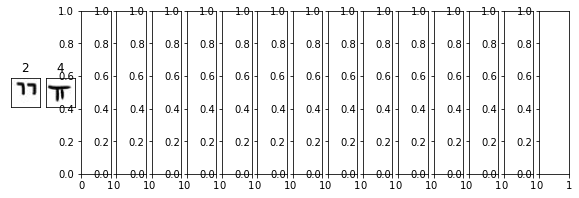

In [14]:
count = 0
fig, axes = plt.subplots(nrows=1, ncols=16, figsize=(10, 3))

model_qcnn.eval()
with no_grad():
    for batch_idx, (data, target) in enumerate(test_loader):
        if count == 16:
            break
        output = model_qcnn(data[:, 0, :, :].reshape((-1, 1, 28, 28)) * 255)
        if len(output.shape) == 1:
            output = output.reshape(1, *output.shape)

        pred = output.argmax(dim=1, keepdim=True)

        axes[count].imshow(data[0, 0, :, :].numpy().squeeze(), cmap="gray")

        axes[count].set_xticks([])
        axes[count].set_yticks([])
        axes[count].set_title(pred[count][0].item())

        count += 1

In [15]:
print(qiskit.__qiskit_version__)

{'qiskit-terra': '0.19.2', 'qiskit-aer': '0.10.3', 'qiskit-ignis': '0.7.0', 'qiskit-ibmq-provider': '0.18.3', 'qiskit-aqua': None, 'qiskit': '0.34.2', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': '0.3.0'}
